In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

df = pd.read_csv('Haberman.csv')
df.info()
df.Class = df.Class.apply(lambda x : x-1)
X = list(df.columns)
X.remove('Class')


print(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   306 non-null    int64
 1   F1      306 non-null    int64
 2   F2      306 non-null    int64
 3   F3      306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
['F1', 'F2', 'F3']


In [37]:
encoded_df = pd.get_dummies(df[X], drop_first=True)

list(encoded_df.columns)

['F1', 'F2', 'F3']

In [38]:
Y = df.Class
X = encoded_df


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [40]:
# 1 build a decision classifier model using 
# (i) Ginni Index and max-depth as 6 

from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 6)

In [41]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [42]:
from sklearn.metrics import roc_auc_score
tree_predict = clf_tree.predict(X_test)
roc_auc_score(y_test, tree_predict)

0.5437062937062936

In [43]:
# 1 iii) information gain (entropy)

clf_tree_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
clf_tree_entropy.fit(X_train, y_train)
tree_predict_entropy = clf_tree_entropy.predict(X_test)
roc_auc_score(y_test, tree_predict_entropy)

0.5163170163170163

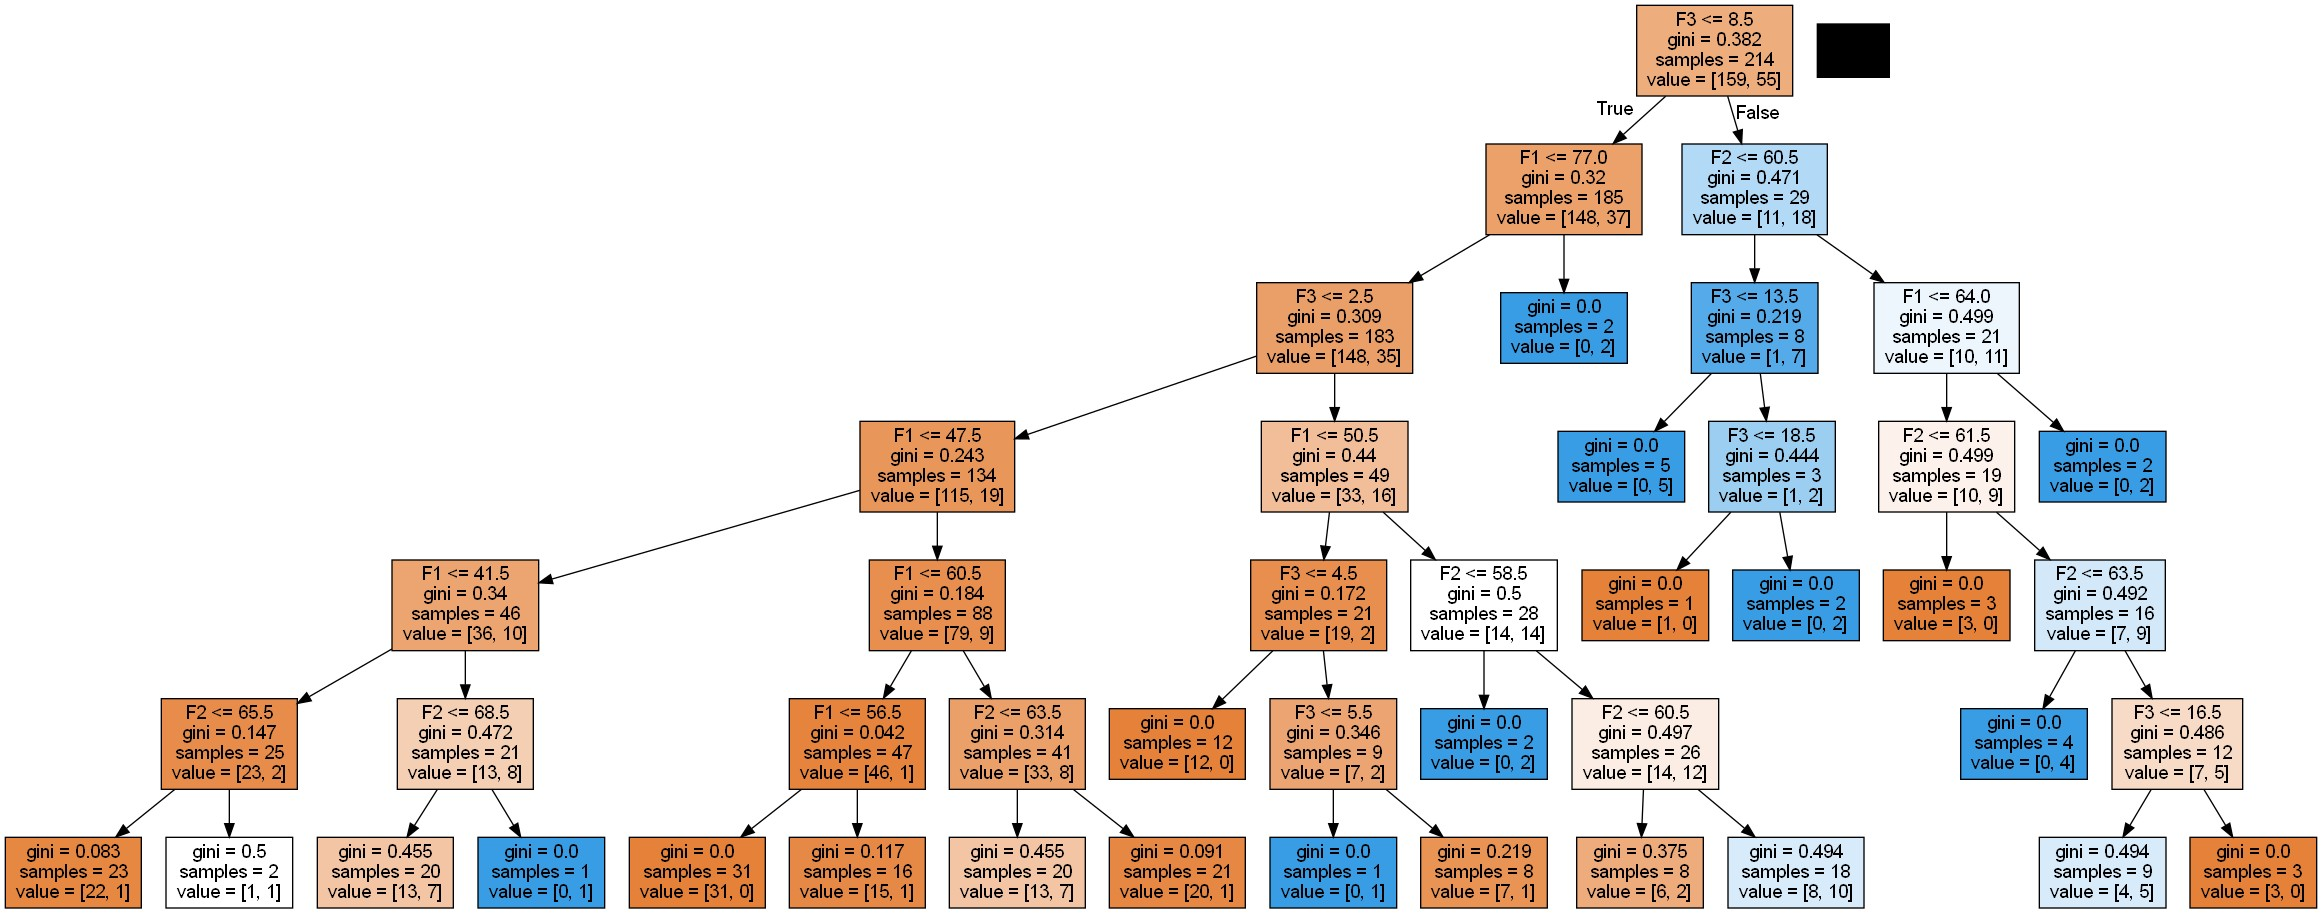

In [48]:
export_graphviz(clf_tree, out_file = "chd_tree.odt", 
                feature_names = X_train.columns, 
                filled = True)

chd_tree_graph = pdot.graphviz.graph_from_dot_file("chd_tree.odt")
chd_tree_graph.write_jpg("chd_tree.png")
Image(filename="chd_tree.png")

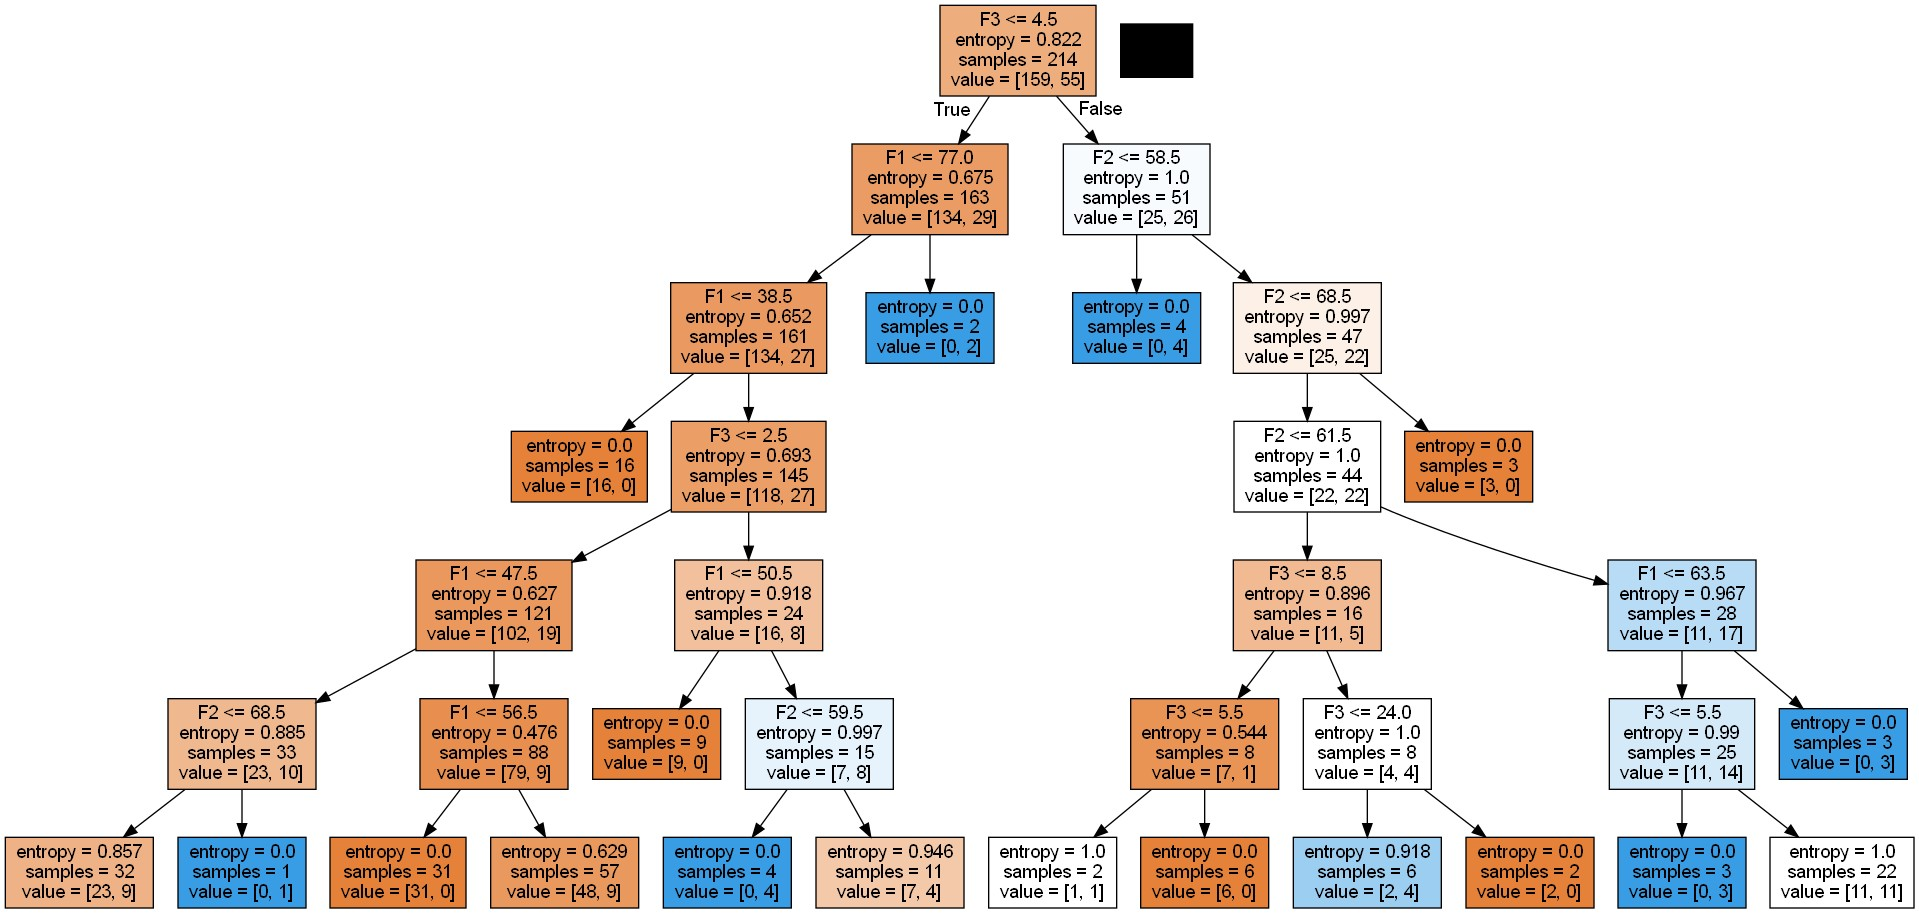

In [50]:
export_graphviz(clf_tree_entropy,
                out_file = "chd_tree_entropy.odt",
               feature_names = X_train.columns,
               filled = True)
chd_tree_graph = pdot.graphviz.graph_from_dot_file("chd_tree_entropy.odt")
chd_tree_graph.write_jpg("chd_tree_entropy.png")
Image(filename="chd_tree_entropy.png")